<a href="https://colab.research.google.com/github/puttadharani/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -<b>Yes Bank Stock Closing Price Prediction
</b>


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name-** Dharani Putta



# **Project Summary -**


Yes Bank, a prominent Indian financial institution, has been in the spotlight due to a high-profile fraud case involving Rana Kapoor. This project aims to explore the impact of this case on Yes Bank's stock prices by analyzing historical stock data. The primary objective is to build predictive models, including time series models, to forecast the monthly closing price of Yes Bank's stock.

By executing this project, we aim to provide insights into how external events, such as the fraud case involving Rana Kapoor, may have influenced Yes Bank's stock prices. Additionally, we seek to evaluate the effectiveness of predictive models in forecasting stock prices under these circumstances, offering valuable information for investors and stakeholders.








# **GitHub Link -**

https://github.com/puttadharani/Yes-bank-stock-closing-price-prediction

# **Problem Statement**


**After analysing the given data, build the models to predict the stock's closing price of the month. Which predictive models, and machine learning algorithms, perform best in forecasting Yes Bank's stock prices?**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np              # Import NumPy for numerical operations
import pandas as pd             # Import Pandas for data manipulation
import matplotlib.pyplot as plt # Import Matplotlib for data visualization
# %matplotlib inline             # Magic command for inline plotting in Jupyter Notebook
import seaborn as sns           # Import Seaborn for enhanced data visualization
import plotly.graph_objects as go  # Import Plotly for interactive plots
from sklearn.model_selection import train_test_split# Import train_test_split for data splitting
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV# Import LinearRegression model
from sklearn.model_selection import GridSearchCV      # Import GridSearchCV for hyperparameter tuning
from xgboost import XGBRegressor         # Import XGBoost library for boosting-based models
from sklearn.ensemble import RandomForestRegressor    # Import RandomForestRegressor for ensemble-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error,mean_absolute_percentage_error  # Import metrics for model evaluation

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Import the necessary library to mount Google Drive
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the dataset from Google Drive into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

"# Import the necessary library to mount Google Drive\nfrom google.colab import drive\n\n# Mount Google Drive to access files\ndrive.mount('/content/drive')\n\n# Load the dataset from Google Drive into a Pandas DataFrame\ndf = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')"

### Dataset First View

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# Dataset first view
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#veiwing last rows of 'df' dataframe
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.shape)
print(f'The dataset has {df.index.size} rows and {df.columns.size} columns')
print('size of data frame:',df.size)

(185, 5)
The dataset has 185 rows and 5 columns
size of data frame: 925


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Date,Open,High,Low,Close


No duplicates exist in the dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

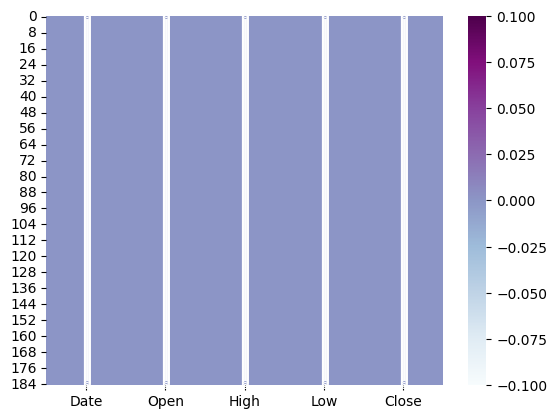

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna(),annot=True,cmap='BuPu')

We can observe that there are no null values in the dataset

### What did you know about your dataset?

This data contains stock prices of Yes Bank, which is a well-known bank in the Indian financial domain. The dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

The main objective is to predict the stock's closing price of the month.

The dataset has 185 rows and 5 columns,
with a size of 925.
And also the dataset has no duplicate and no null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

**Date** : Date of record<br>
**Open** : Opening price<br>
**High** : Highest price in the day<br>
**Low** : Lowest price in the day<br>
**Close** : Closing price

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique values in each variable is listed below:')
df.nunique()

Number of unique values in each variable is listed below:


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## ***3.Data Wrangling***

### Data Wrangling Code

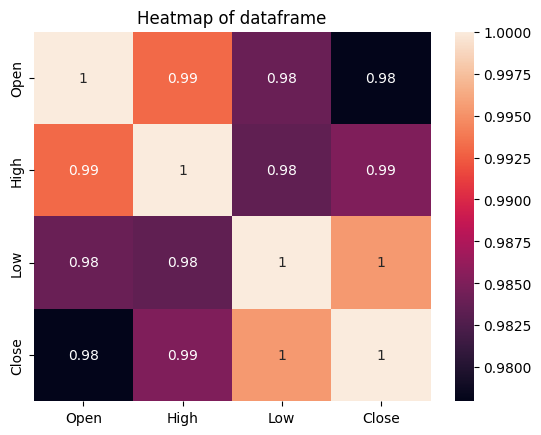

In [ ]:
#visualising correlation between variables
sns.heatmap(df[['Open','High','Low','Close']].corr(),annot=True)
plt.title('Heatmap of dataframe')
plt.show()

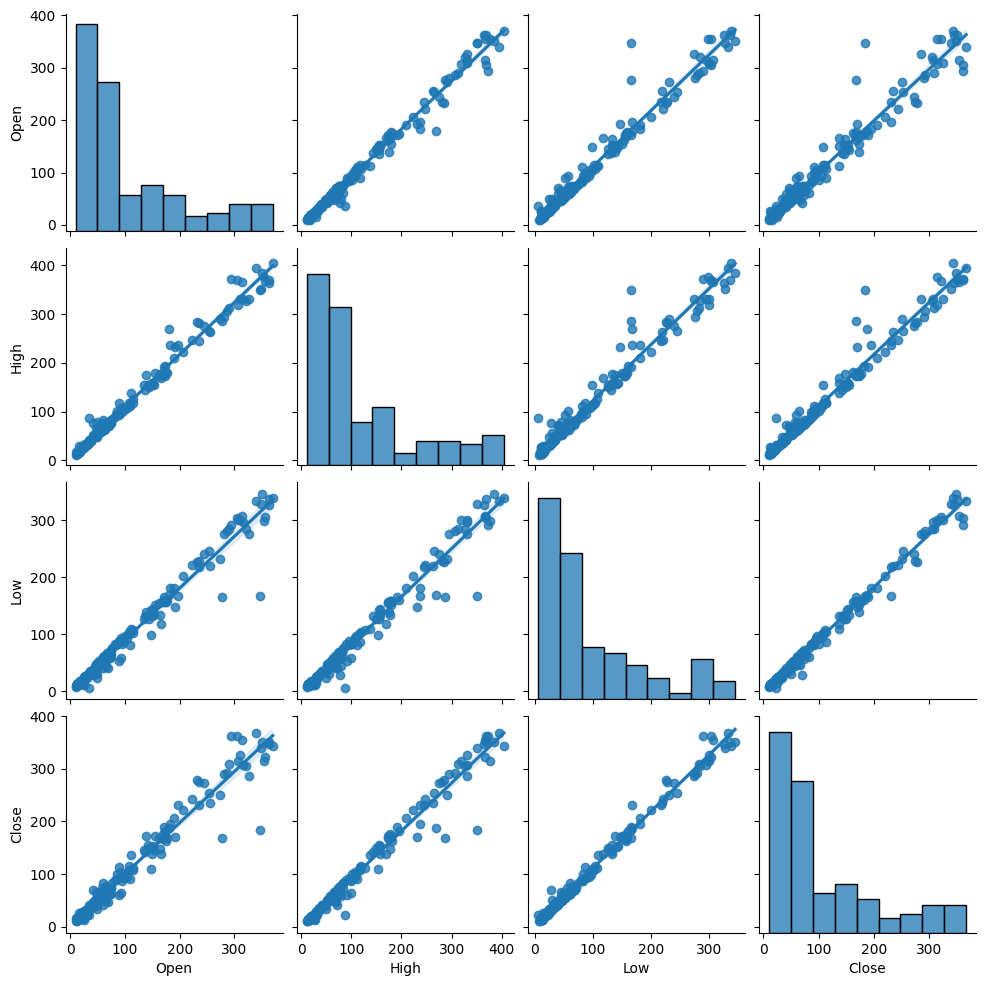

In [ ]:
# Create a pair plot using Seaborn
# A pair plot is a grid of scatterplots for visualizing relationships between numerical variables
# 'df' is the DataFrame containing the data
# 'kind='reg'' adds regression lines to the scatterplots

sns.pairplot(df, kind='reg')

the above pair plot shows a strong positive linear relationship between all columns

In [ ]:
# Define a function to find outliers using the Interquartile Range (IQR) method
def inter_quartile_range(i):
  # Calculate quartiles (25th, 50th, and 85th percentiles) of the input data 'i'
  quartile = np.quantile(i, [0.25, 0.5, 0.75])
  print('25%, 50%, 85% quantiles:', quartile)

  # Calculate the Interquartile Range (IQR) as the difference between the 75th and 25th percentiles
  iqr = quartile[2] - quartile[0]
  print('IQR (Interquartile Range):', iqr)

  # Calculate the lower and upper fences for outlier detection
  lower_fence = quartile[0] - 1.5 * iqr
  higher_fence = quartile[2] + 1.5 * iqr
  print('Lower fence:', lower_fence)
  print('Higher fence:', higher_fence)

  # Print outliers in the 'Open' column of the DataFrame 'df'
  print('Outliers:')
  for value in df['Open']:
    if value < lower_fence or value > higher_fence:
      print(value)
  else:
    print(0)

In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Open' column of the DataFrame 'df'
open_quartile=inter_quartile_range(df['Open'])

25%, 50%, 85% quantiles: [ 33.8   62.98 153.  ]
IQR (Interquartile Range): 119.2
Lower fence: -145.0
Higher fence: 331.8
Outliers:
363.0
351.0
354.6
355.0
362.85
348.0
340.0
369.95
347.2
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'High' column of the DataFrame 'df'
high_quantile=inter_quartile_range(df['High'])


25%, 50%, 85% quantiles: [ 36.14  72.55 169.19]
IQR (Interquartile Range): 133.05
Lower fence: -163.435
Higher fence: 368.765
Outliers:
369.95
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Low' column of the DataFrame 'df'
low_quantile=inter_quartile_range(df['Low'])

25%, 50%, 85% quantiles: [ 28.51  58.   138.35]
IQR (Interquartile Range): 109.83999999999999
Lower fence: -136.25
Higher fence: 303.11
Outliers:
309.6
326.0
363.0
351.0
354.6
315.5
307.2
314.0
355.0
320.7
305.0
362.85
348.0
340.0
369.95
347.2
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Close' column of the DataFrame 'df'
close_quantile=inter_quartile_range(df['Close'])

25%, 50%, 85% quantiles: [ 33.45  62.54 153.3 ]
IQR (Interquartile Range): 119.85000000000001
Lower fence: -146.325
Higher fence: 333.07500000000005
Outliers:
363.0
351.0
354.6
355.0
362.85
348.0
340.0
369.95
347.2
0


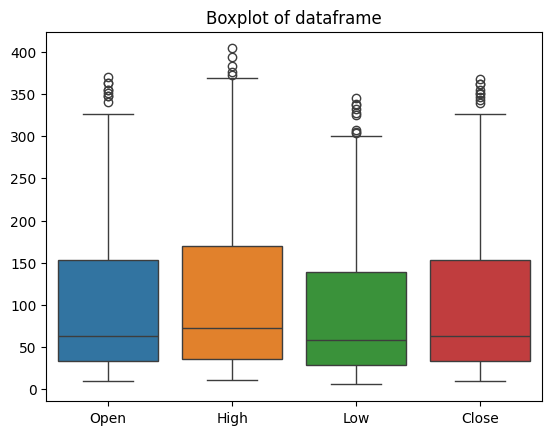

In [ ]:
#visualing outliers in the dataframe
# Create a boxplot to visualize the distribution of data in the entire DataFrame 'df'
# A boxplot helps identify potential outliers and the spread of the data

# Use Seaborn's 'boxplot' function with the entire DataFrame 'df' as input
sns.boxplot(data=df)

# Set the title of the plot
plt.title('Boxplot of dataframe')

# Display the plot
plt.show()

Outliers exist in every column of the dataframe.


Line chart of opening and Closing price


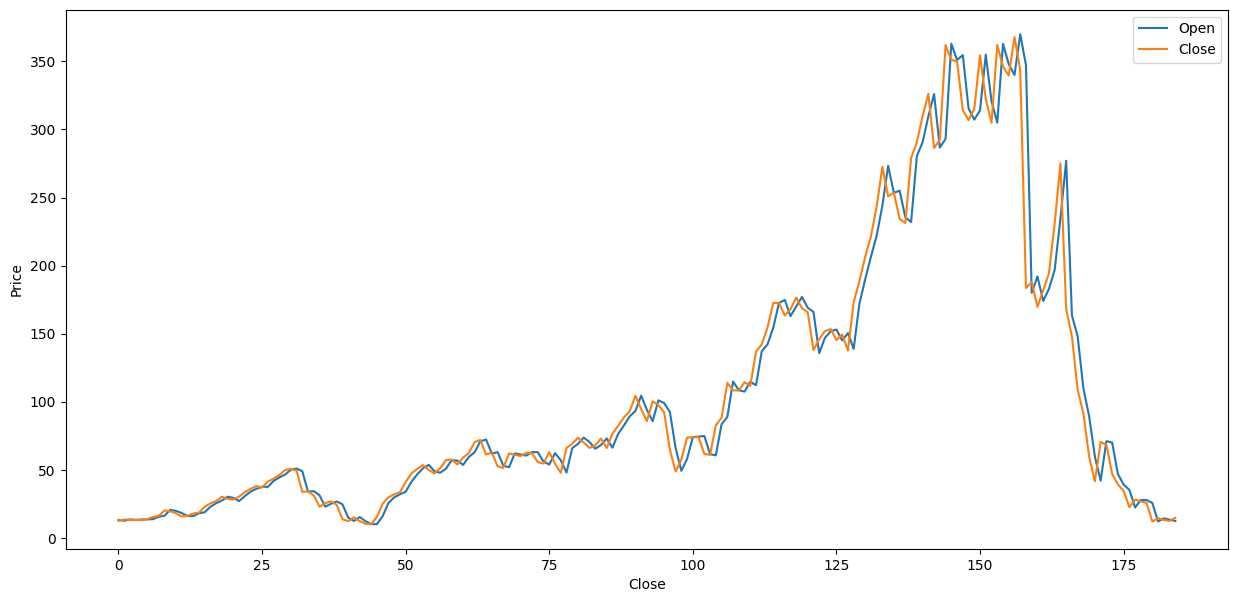

In [ ]:
# Print a descriptive message
print('Line chart of opening and Closing price')

# Create a line chart to visualize the 'Open' and 'Close' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Open' and 'Close' columns and then call the 'plot' method
df[['Open', 'Close']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of close and high price


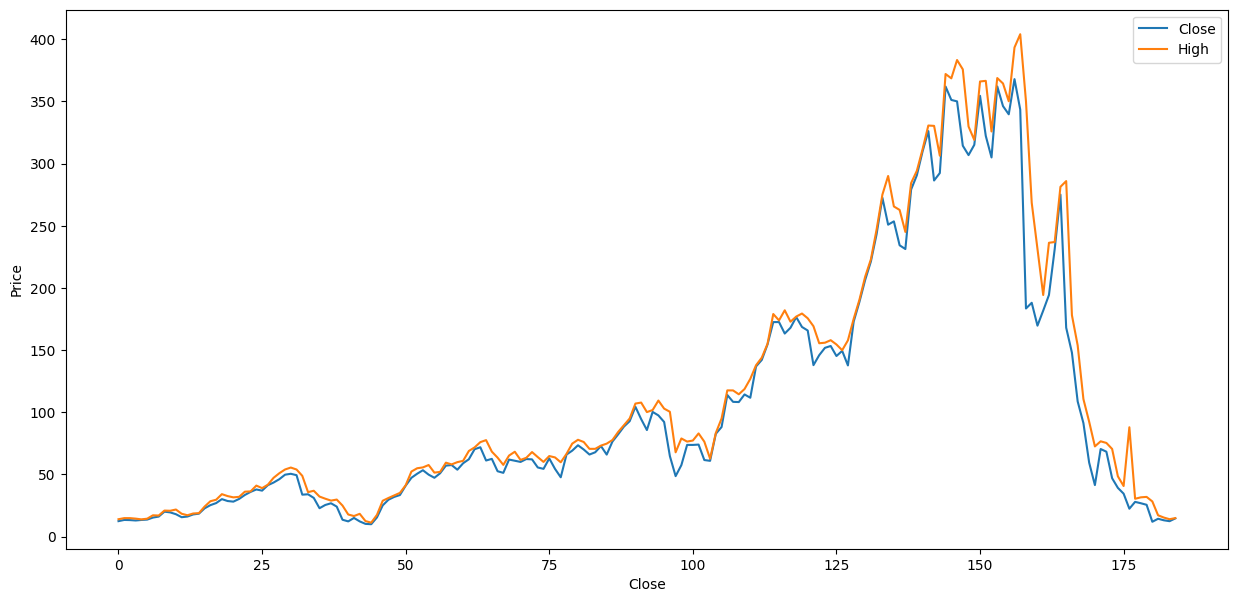

In [ ]:
# Print a descriptive message
print('Line chart of close and high price')

# Create a line chart to visualize the 'Close' and 'High' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Close' and 'High' columns and then call the 'plot' method
df[['Close', 'High']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of low and high price


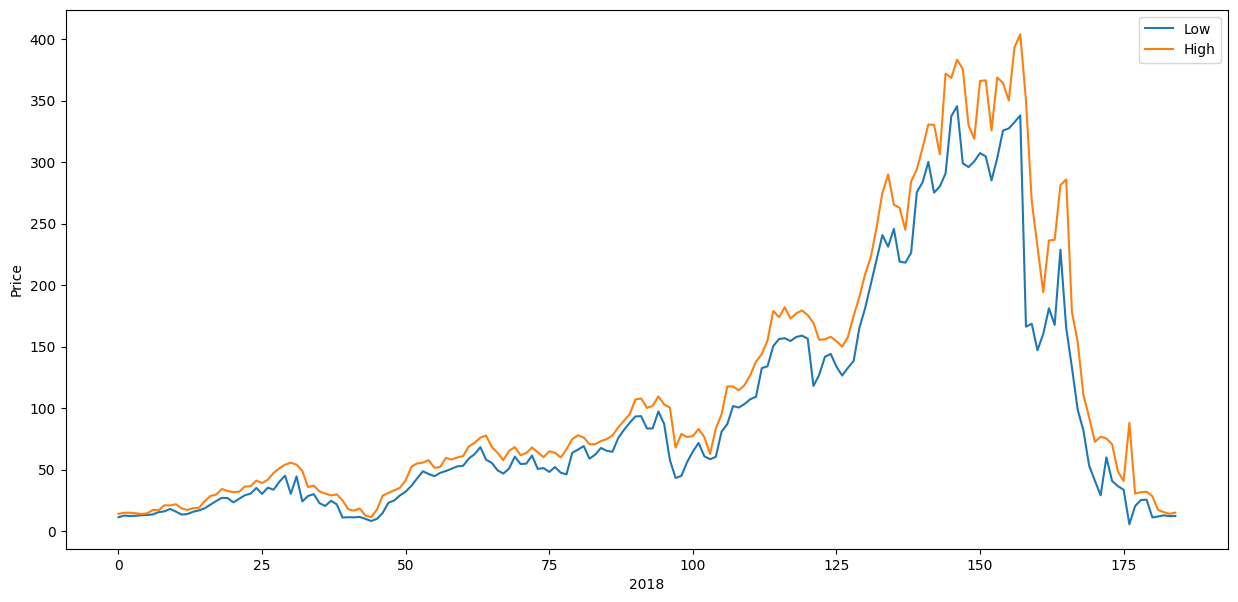

In [ ]:
# Print a descriptive message
print('Line chart of low and high price')

# Create a line chart to visualize the 'Low' and 'High' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Low' and 'High' columns and then call the 'plot' method
df[['Low', 'High']].plot(figsize=(15, 7))

# Set the x-axis label to '2018'
plt.xlabel('2018')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of low and Close price


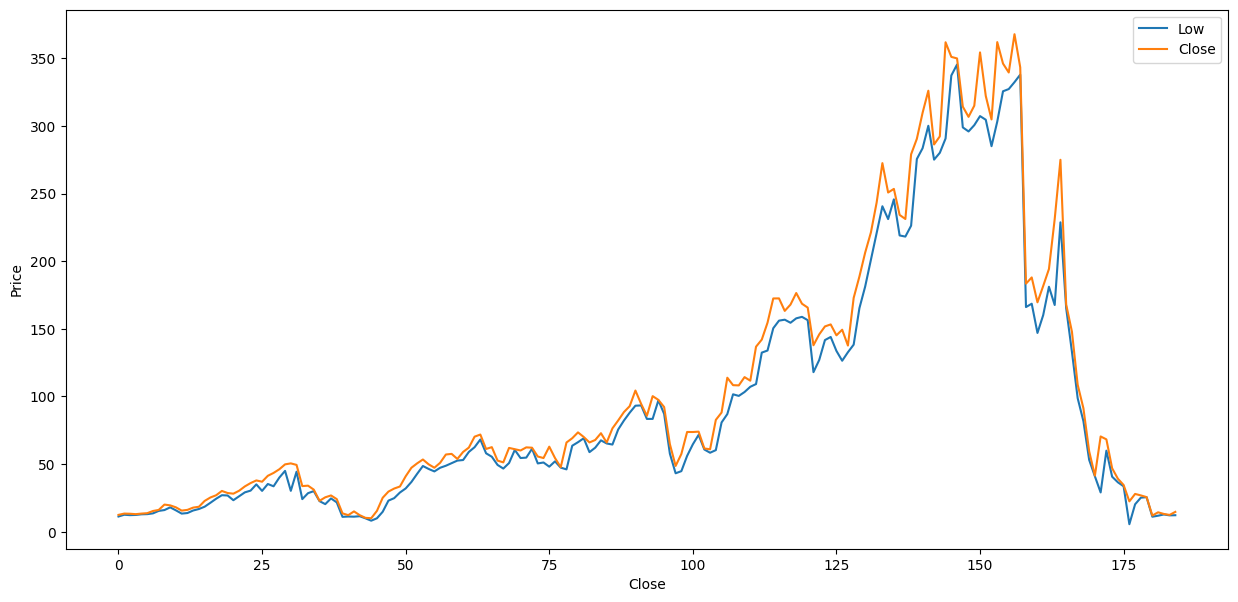

In [ ]:
# Print a descriptive message
print('Line chart of low and Close price')

# Create a line chart to visualize the 'Low' and 'Close' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Low' and 'Close' columns and then call the 'plot' method
df[['Low', 'Close']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()

In [ ]:
#creating a copy of original dataframe
# Create a new DataFrame 'df_copy' by making a copy of the DataFrame 'df'
df_copy =df

# Display the first few rows of the 'df_copy' DataFrame using the 'head' method
df_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#creating a new column for month
# Create a new column 'Month' in the 'df_copy' DataFrame
# Extract the first three characters (abbreviated month) from the 'Date' column in the original 'df' DataFrame
df_copy['Month'] = df['Date'].str[:3]

# Create a new column 'Day' in the 'df_copy' DataFrame
# Copy the values from the 'Date' column in the original 'df' DataFrame
df_copy['Day'] = df['Date']

# Display the first few rows of the modified 'df_copy' DataFrame to inspect the changes
df_copy.head()

,Date,Open,High,Low,Close,Month,Day
0,Jul-05,13.00,14.00,11.25,12.46,Jul,Jul-05
1,Aug-05,12.58,14.88,12.55,13.42,Aug,Aug-05
2,Sep-05,13.48,14.87,12.27,13.30,Sep,Sep-05
3,Oct-05,13.20,14.47,12.40,12.99,Oct,Oct-05
4,Nov-05,13.35,13.88,12.88,13.41,Nov,Nov-05


In [ ]:
# Define a dictionary 'month_dict' that maps abbreviated month names to month numbers
month_dict = {
    'Jan': '2018-01', 'Feb': '2018-02', 'Mar': '2018-03', 'Apr': '2018-04',
    'May': '2018-05', 'Jun': '2018-06', 'Jul': '2018-07', 'Aug': '2018-08',
    'Sep': '2018-09', 'Oct': '2018-10', 'Nov': '2018-11', 'Dec': '2018-12'
}

# Modify the 'Date' column in the 'df_copy' DataFrame:
# - Replace abbreviated month names with their corresponding month numbers using 'month_dict'
# - Append the last three characters of the original 'Date' column (the year) to the modified month number
df_copy['Date'] = df_copy['Month'].replace(month_dict) + df_copy['Date'].str[-3:]

# Sort the 'df_copy' DataFrame by the 'Date' column in ascending order
df_copy.sort_values(by=['Date'], inplace=True)

# Reset the index of the 'df_copy' DataFrame
df_copy.reset_index(inplace=True)

# Display the modified 'df_copy' DataFrame
df_copy


,index,Date,Open,High,Low,Close,Month,Day
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,Jan-06
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,Jan-07
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,Jan-08
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,Jan-09
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,Jan-10
...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,Dec-15
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,Dec-16
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,Dec-17
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,Dec-18


In [ ]:
# Create a new column 'new' in the 'df_copy' DataFrame
# Generate an array of integers from 1 to 185 (inclusive) using NumPy's 'arange' function
# The 'dtype=object' argument ensures that the elements are stored as objects
df_copy['new'] = np.arange(1, 186, 1, dtype=object)

# Modify the 'Day' column in the 'df_copy' DataFrame:
# - Convert the 'new' column to a string data type using 'astype(str)'
# - Concatenate an underscore '_' and the original 'Day' values to the converted 'new' values
df_copy['Day'] = df_copy['new'].astype(str) + '_' + df_copy['Day']

# Display the modified 'df_copy' DataFrame
df_copy

,index,Date,Open,High,Low,Close,Month,Day,new
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06,1
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07,2
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08,3
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09,4
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10,5
...,...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,181_Dec-15,181
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,182_Dec-16,182
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,183_Dec-17,183
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,184_Dec-18,184


In [ ]:
#dropping unwanted columns
df_copy.drop(['new'],axis=1,inplace=True)
df_copy


,index,Date,Open,High,Low,Close,Month,Day
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10
...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,181_Dec-15
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,182_Dec-16
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,183_Dec-17
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,184_Dec-18


**What is a Candle stick and how does it look?**<br>
A candlestick is a type of price chart used in technical analysis that displays the high, low, open, and closing prices of a security for a specific period.

(https://miro.medium.com/v2/resize:fit:828/format:webp/1*cTBBe_HZgOQ9AHkdrIoofw.png)
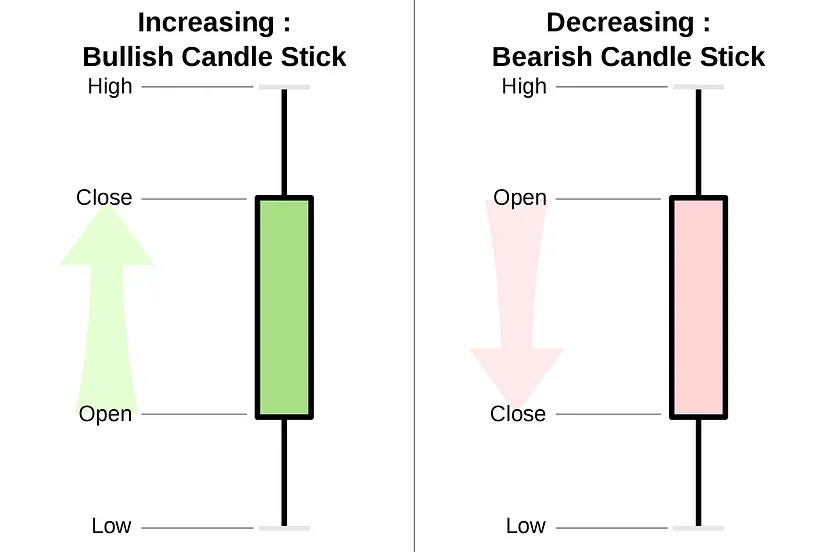

In [ ]:
#Creating Dataframes for each month
def monthly_df(i):
  dummy_df=df_copy[df_copy['Month']==i].reset_index()

  #dropping unwanted column
  dummy_df.drop(['index'],axis=1,inplace=True)
  return dummy_df

In [ ]:
#visualizing stock price
def chart(j):
  fig = go.Figure(data=[go.Candlestick(x=j['Date'],
                  open=j['Open'],
                  high=j['High'],
                  low=j['Low'],
                  close=j['Close'])])
  fig.show()


In [ ]:
def high(j):
  #knowing highest close price in specific month
  print('highest close is',j['Close'].max())

  #finding the details of maximum close price
  return(j[j['Close']==j['Close'].max()])


In [ ]:
def low(j):
  #knowing lowest close price in specific month
  print('lowest close is',j['Close'].min())

  #finding the details of minimum close price
  return(j[j['Close']==j['Close'].min()])


In [ ]:
#multivariate analysis
#plotting candlestick plot for the 'df_copy' dataframe
print('candlestick chart of stock prices ')
fig = go.Figure(data=[go.Candlestick(x=df_copy['Day'],
                  open=df_copy['Open'],
                  high=df_copy['High'],
                  low=df_copy['Low'],
                  close=df_copy['Close']
                                     )])
fig.show()

# Call the 'high' function to create and display a candlestick chart for the 'df_copy' DataFrame
high(df_copy)


candlestick chart of stock prices 


highest close is 367.9


,index,Date,Open,High,Low,Close,Month,Day
103,156,2018-07-18,340.0,393.35,332.45,367.9,Jul,104_Jul-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'df' DataFrame
low(df)

lowest close is 9.98


,index,Date,Open,High,Low,Close,Month,Day
33,44,2018-03-09,10.0,11.24,8.16,9.98,Mar,34_Mar-09


In [ ]:
#stock price movement in the month of January
january_df=monthly_df('Jan')
january_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,0,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06
1,1,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07
2,2,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08
3,3,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09
4,4,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10
5,5,2018-01-11,62.98,63.54,49.39,52.59,Jan,6_Jan-11
6,6,2018-01-12,47.92,66.50,46.11,65.99,Jan,7_Jan-12
7,7,2018-01-13,93.20,107.00,93.20,104.41,Jan,8_Jan-13
8,8,2018-01-14,74.74,76.35,60.80,61.59,Jan,9_Jan-14
9,9,2018-01-15,154.40,179.00,150.47,172.50,Jan,10_Jan-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'january_df' DataFrame
print('candlestick chart of stock prices in january')
chart(january_df)

high(january_df)


candlestick chart of stock prices in january


highest close is 354.45


,level_0,Date,Open,High,Low,Close,Month,Day
12,12,2018-01-18,314.0,366.0,307.35,354.45,Jan,13_Jan-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'january_df' DataFrame
low(january_df)

lowest close is 12.24


,level_0,Date,Open,High,Low,Close,Month,Day
3,3,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09


In [ ]:
#stock price movement in the month of february
february_df=monthly_df('Feb')
february_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,15,2018-02-06,15.50,16.97,15.40,16.12,Feb,16_Feb-06
1,16,2018-02-07,30.20,32.60,26.80,28.63,Feb,17_Feb-07
2,17,2018-02-08,50.88,53.97,44.40,49.42,Feb,18_Feb-08
3,18,2018-02-09,12.19,12.50,9.90,10.26,Feb,19_Feb-09
4,19,2018-02-10,49.00,51.48,44.60,47.32,Feb,20_Feb-10
5,20,2018-02-11,53.00,57.69,46.71,51.29,Feb,21_Feb-11
6,21,2018-02-12,65.90,74.80,63.60,69.14,Feb,22_Feb-12
7,22,2018-02-13,104.41,107.80,93.40,94.50,Feb,23_Feb-13
8,23,2018-02-14,61.54,62.70,58.42,60.95,Feb,24_Feb-14
9,24,2018-02-15,172.50,173.88,156.10,172.55,Feb,25_Feb-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'february_df' DataFrame
print('candlestick chart of stock prices in february')
chart(february_df)

high(february_df)


candlestick chart of stock prices in february


highest close is 322.25


,level_0,Date,Open,High,Low,Close,Month,Day
12,27,2018-02-18,355.0,366.5,304.65,322.25,Feb,28_Feb-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'february_df' DataFrame
low(february_df)

lowest close is 10.26


,level_0,Date,Open,High,Low,Close,Month,Day
3,18,2018-02-09,12.19,12.5,9.9,10.26,Feb,19_Feb-09


In [ ]:
#stock price movement in the month of march
march_df=monthly_df('Mar')
march_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,30,2018-03-06,16.20,20.95,16.02,20.08,Mar,31_Mar-06
1,31,2018-03-07,29.30,31.58,23.31,28.14,Mar,32_Mar-07
2,32,2018-03-08,48.90,48.90,24.11,33.75,Mar,33_Mar-08
3,33,2018-03-09,10.00,11.24,8.16,9.98,Mar,34_Mar-09
4,34,2018-03-10,47.80,52.06,47.30,50.97,Mar,35_Mar-10
5,35,2018-03-11,51.84,65.20,50.80,61.98,Mar,36_Mar-11
6,36,2018-03-12,69.00,77.88,66.20,73.46,Mar,37_Mar-12
7,37,2018-03-13,94.00,100.15,83.42,85.71,Mar,38_Mar-13
8,38,2018-03-14,60.52,83.36,60.34,82.70,Mar,39_Mar-14
9,39,2018-03-15,174.80,182.00,156.80,163.31,Mar,40_Mar-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'march_df' DataFrame
print('candlestick chart of stock prices in march')
chart(march_df)

high(march_df)


candlestick chart of stock prices in march


highest close is 309.82


,level_0,Date,Open,High,Low,Close,Month,Day
11,41,2018-03-17,290.6,311.57,283.6,309.82,Mar,42_Mar-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'march_df' DataFrame
low(march_df)

lowest close is 9.98


,level_0,Date,Open,High,Low,Close,Month,Day
3,33,2018-03-09,10.0,11.24,8.16,9.98,Mar,34_Mar-09


In [ ]:
#stock price movement in the month of april
april_df=monthly_df('Apr')
april_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,45,2018-04-06,20.56,20.80,18.02,19.49,Apr,46_Apr-06
1,46,2018-04-07,27.00,31.99,26.20,30.31,Apr,47_Apr-07
2,47,2018-04-08,33.90,35.80,28.51,34.06,Apr,48_Apr-08
3,48,2018-04-09,10.04,17.51,9.94,15.45,Apr,49_Apr-09
4,49,2018-04-10,50.67,59.48,48.80,57.10,Apr,50_Apr-10
5,50,2018-04-11,62.00,68.26,60.50,61.02,Apr,51_Apr-11
6,51,2018-04-12,73.62,76.10,69.11,70.07,Apr,52_Apr-12
7,52,2018-04-13,85.70,101.80,83.43,100.28,Apr,53_Apr-13
8,53,2018-04-14,83.45,94.98,80.80,88.14,Apr,54_Apr-14
9,54,2018-04-15,162.80,172.80,154.53,167.96,Apr,55_Apr-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'april_df' DataFrame
print('candlestick chart of stock prices in april')
chart(april_df)

high(april_df)


candlestick chart of stock prices in april


highest close is 362.05


,level_0,Date,Open,High,Low,Close,Month,Day
12,57,2018-04-18,305.0,368.75,303.3,362.05,Apr,58_Apr-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'low_df' DataFrame
low(april_df)

lowest close is 15.45


,level_0,Date,Open,High,Low,Close,Month,Day
3,48,2018-04-09,10.04,17.51,9.94,15.45,Apr,49_Apr-09


In [ ]:
#stock price movement in the month of May
may_df=monthly_df('May')
may_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,60,2018-05-06,19.80,21.80,15.80,18.03,May,61_May-06
1,61,2018-05-07,30.66,36.14,29.11,33.51,May,62_May-07
2,62,2018-05-08,34.30,36.88,30.03,31.13,May,63_May-08
3,63,2018-05-09,15.94,28.84,14.76,25.12,May,64_May-09
4,64,2018-05-10,56.94,58.08,50.66,57.57,May,65_May-10
5,65,2018-05-11,61.26,61.68,54.50,60.07,May,66_May-11
6,66,2018-05-12,70.40,70.59,58.85,66.02,May,67_May-12
7,67,2018-05-13,100.99,109.43,97.20,97.49,May,68_May-13
8,68,2018-05-14,88.80,117.60,86.98,113.89,May,69_May-14
9,69,2018-05-15,170.00,176.96,157.80,176.52,May,70_May-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'may_df' DataFrame
print('candlestick chart of stock prices in may')
chart(may_df)

high(may_df)


candlestick chart of stock prices in may


highest close is 346.2


,level_0,Date,Open,High,Low,Close,Month,Day
12,72,2018-05-18,362.85,364.4,325.7,346.2,May,73_May-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'may_df' DataFrame
low(may_df)

lowest close is 18.03


,level_0,Date,Open,High,Low,Close,Month,Day
0,60,2018-05-06,19.8,21.8,15.8,18.03,May,61_May-06


In [ ]:
#stock price movement in the month of June
june_df=monthly_df('Jun')
june_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,75,2018-06-06,18.20,18.40,13.40,15.62,Jun,76_Jun-06
1,76,2018-06-07,33.89,36.38,30.40,35.98,Jun,77_Jun-07
2,77,2018-06-08,31.22,32.22,22.62,22.85,Jun,78_Jun-08
3,78,2018-06-09,25.60,31.08,23.00,29.68,Jun,79_Jun-09
4,79,2018-06-10,56.70,59.90,52.60,53.83,Jun,80_Jun-10
5,80,2018-06-11,60.40,63.39,54.80,62.38,Jun,81_Jun-11
6,81,2018-06-12,65.45,70.60,62.14,67.83,Jun,82_Jun-12
7,82,2018-06-13,99.00,102.94,87.15,92.20,Jun,83_Jun-13
8,83,2018-06-14,114.80,117.57,101.62,108.38,Jun,84_Jun-14
9,84,2018-06-15,177.00,179.40,158.90,168.60,Jun,85_Jun-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'june_df' DataFrame
print('candlestick chart of stock prices in june')
chart(june_df)

high(june_df)


candlestick chart of stock prices in june


highest close is 339.6


,level_0,Date,Open,High,Low,Close,Month,Day
12,87,2018-06-18,348.0,350.1,327.35,339.6,Jun,88_Jun-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'june_df' DataFrame
low(june_df)

lowest close is 15.62


,level_0,Date,Open,High,Low,Close,Month,Day
0,75,2018-06-06,18.2,18.4,13.4,15.62,Jun,76_Jun-06


In [ ]:
#stock price movement in the month of July
july_df=monthly_df('Jul')
july_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,90,2018-07-05,13.00,14.00,11.25,12.46,Jul,91_Jul-05
1,91,2018-07-06,16.00,17.20,13.82,16.16,Jul,92_Jul-06
2,92,2018-07-07,35.98,41.04,35.02,37.93,Jul,93_Jul-07
3,93,2018-07-08,22.85,30.50,20.40,25.45,Jul,94_Jul-08
4,94,2018-07-09,29.70,33.16,24.83,31.93,Jul,95_Jul-09
5,95,2018-07-10,53.55,60.94,53.02,58.99,Jul,96_Jul-10
6,96,2018-07-11,63.00,68.00,61.36,62.13,Jul,97_Jul-11
7,97,2018-07-12,68.15,73.19,67.57,72.85,Jul,98_Jul-12
8,98,2018-07-13,92.40,100.40,57.71,64.76,Jul,99_Jul-13
9,99,2018-07-14,108.43,114.46,100.44,108.21,Jul,100_Jul-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'july_df' DataFrame
print('candlestick chart of stock prices in july')
chart(july_df)

high(july_df)


candlestick chart of stock prices in july


highest close is 367.9


,level_0,Date,Open,High,Low,Close,Month,Day
13,103,2018-07-18,340.0,393.35,332.45,367.9,Jul,104_Jul-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'july_df' DataFrame
low(july_df)

lowest close is 11.95


,level_0,Date,Open,High,Low,Close,Month,Day
15,105,2018-07-20,25.6,28.3,11.1,11.95,Jul,106_Jul-20


In [ ]:
#stock price movement in the month of august
august_df=monthly_df('Aug')
august_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,106,2018-08-05,12.58,14.88,12.55,13.42,Aug,107_Aug-05
1,107,2018-08-06,15.90,18.60,15.70,17.84,Aug,108_Aug-06
2,108,2018-08-07,37.50,39.00,30.20,36.99,Aug,109_Aug-07
3,109,2018-08-08,25.00,28.98,24.62,26.83,Aug,110_Aug-08
4,110,2018-08-09,31.98,35.18,29.00,33.45,Aug,111_Aug-09
5,111,2018-08-10,59.40,68.88,59.01,62.22,Aug,112_Aug-10
6,112,2018-08-11,62.90,63.96,50.51,55.61,Aug,113_Aug-11
7,113,2018-08-12,73.00,74.78,65.27,65.97,Aug,114_Aug-12
8,114,2018-08-13,66.00,67.81,43.22,48.65,Aug,115_Aug-13
9,115,2018-08-14,107.40,118.69,103.31,114.33,Aug,116_Aug-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'august_df' DataFrame
print('candlestick chart of stock prices in august')
chart(august_df)

high(august_df)


candlestick chart of stock prices in august


highest close is 351.15


,level_0,Date,Open,High,Low,Close,Month,Day
12,118,2018-08-17,363.0,368.52,337.37,351.15,Aug,119_Aug-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'august_df' DataFrame
low(august_df)

lowest close is 13.42


,level_0,Date,Open,High,Low,Close,Month,Day
0,106,2018-08-05,12.58,14.88,12.55,13.42,Aug,107_Aug-05


In [ ]:
#stock price movement in the month of september
september_df=monthly_df('Sep')
september_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,122,2018-09-05,13.48,14.87,12.27,13.30,Sep,123_Sep-05
1,123,2018-09-06,18.00,18.88,16.80,18.46,Sep,124_Sep-06
2,124,2018-09-07,37.40,41.75,35.30,41.36,Sep,125_Sep-07
3,125,2018-09-08,26.68,29.80,21.70,24.13,Sep,126_Sep-08
4,126,2018-09-09,33.80,41.30,32.00,40.99,Sep,127_Sep-09
5,127,2018-09-10,62.80,71.74,62.51,70.30,Sep,128_Sep-10
6,128,2018-09-11,56.00,60.08,51.20,54.50,Sep,129_Sep-11
7,129,2018-09-12,66.20,77.69,64.46,76.44,Sep,130_Sep-12
8,130,2018-09-13,49.20,78.94,44.80,57.50,Sep,131_Sep-13
9,131,2018-09-14,114.60,126.85,107.18,111.70,Sep,132_Sep-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'september_df' DataFrame
print('candlestick chart of stock prices in september')
chart(september_df)

high(september_df)


candlestick chart of stock prices in september


highest close is 350.0


,level_0,Date,Open,High,Low,Close,Month,Day
12,134,2018-09-17,351.0,383.25,345.5,350.0,Sep,135_Sep-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'september_df' DataFrame
low(september_df)

lowest close is 13.15


,level_0,Date,Open,High,Low,Close,Month,Day
15,137,2018-09-20,14.3,15.34,12.75,13.15,Sep,138_Sep-20


In [ ]:
#stock price movement in the month of october
october_df=monthly_df('Oct')
october_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,138,2018-10-05,13.20,14.47,12.40,12.99,Oct,139_Oct-05
1,139,2018-10-06,18.78,24.20,18.50,22.78,Oct,140_Oct-06
2,140,2018-10-07,41.80,47.30,33.60,43.48,Oct,141_Oct-07
3,141,2018-10-08,24.60,25.00,11.01,13.58,Oct,142_Oct-08
4,142,2018-10-09,41.20,52.34,36.80,47.31,Oct,143_Oct-09
5,143,2018-10-10,70.90,76.00,68.21,71.86,Oct,144_Oct-10
6,144,2018-10-11,53.80,64.80,48.10,62.90,Oct,145_Oct-11
7,145,2018-10-12,76.40,84.20,75.60,82.29,Oct,146_Oct-12
8,146,2018-10-13,58.00,76.44,56.08,73.76,Oct,147_Oct-13
9,147,2018-10-14,112.10,137.80,109.20,136.83,Oct,148_Oct-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'october_df' DataFrame
print('candlestick chart of stock prices in october')
chart(october_df)

high(october_df)


candlestick chart of stock prices in october


highest close is 314.35


,level_0,Date,Open,High,Low,Close,Month,Day
12,150,2018-10-17,354.6,375.75,299.0,314.35,Oct,151_Oct-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'october_df' DataFrame
low(october_df)

lowest close is 12.42


,level_0,Date,Open,High,Low,Close,Month,Day
15,153,2018-10-20,13.3,14.01,12.11,12.42,Oct,154_Oct-20


In [ ]:
#stock price movement in the month of November
november_df=monthly_df('Nov')
november_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,154,2018-11-05,13.35,13.88,12.88,13.41,Nov,155_Nov-05
1,155,2018-11-06,22.80,28.47,21.40,25.32,Nov,156_Nov-06
2,156,2018-11-07,44.40,50.98,40.02,46.18,Nov,157_Nov-07
3,157,2018-11-08,14.79,17.80,11.25,12.26,Nov,158_Nov-08
4,158,2018-11-09,46.58,54.98,42.84,50.57,Nov,159_Nov-09
5,159,2018-11-10,72.20,77.60,58.00,61.21,Nov,160_Nov-10
6,160,2018-11-11,62.20,63.70,52.04,54.49,Nov,161_Nov-11
7,161,2018-11-12,82.54,89.60,82.22,88.48,Nov,162_Nov-12
8,162,2018-11-13,74.00,77.27,64.65,73.74,Nov,163_Nov-13
9,163,2018-11-14,137.10,143.91,132.44,142.08,Nov,164_Nov-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'november_df' DataFrame
print('candlestick chart of stock prices in november')
chart(november_df)

high(november_df)


candlestick chart of stock prices in november


highest close is 306.8


,level_0,Date,Open,High,Low,Close,Month,Day
12,166,2018-11-17,315.5,329.8,296.0,306.8,Nov,167_Nov-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'november_df' DataFrame
low(november_df)

lowest close is 12.26


,level_0,Date,Open,High,Low,Close,Month,Day
3,157,2018-11-08,14.79,17.8,11.25,12.26,Nov,158_Nov-08


In [ ]:
#stock price movement in the month of december
december_df=monthly_df('Dec')
december_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,170,2018-12-05,13.49,14.44,13.00,13.71,Dec,171_Dec-05
1,171,2018-12-06,25.40,29.66,24.40,26.97,Dec,172_Dec-06
2,172,2018-12-07,46.40,54.00,45.00,49.81,Dec,173_Dec-07
3,173,2018-12-08,12.40,16.56,11.13,15.03,Dec,174_Dec-08
4,174,2018-12-09,50.98,55.67,48.60,53.41,Dec,175_Dec-09
5,175,2018-12-10,61.80,68.36,55.44,62.54,Dec,176_Dec-10
6,176,2018-12-11,57.00,59.80,47.40,47.72,Dec,177_Dec-11
7,177,2018-12-12,89.20,95.00,88.01,92.84,Dec,178_Dec-12
8,178,2018-12-13,74.40,83.00,71.63,74.02,Dec,179_Dec-13
9,179,2018-12-14,142.08,155.00,134.00,154.57,Dec,180_Dec-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'december_df' DataFrame
print('candlestick chart of stock prices in december')
chart(december_df)

high(december_df)


candlestick chart of stock prices in december


highest close is 315.05


,level_0,Date,Open,High,Low,Close,Month,Day
12,182,2018-12-17,307.2,319.0,300.65,315.05,Dec,183_Dec-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'december_df' DataFrame
low(december_df)

lowest close is 13.71


,level_0,Date,Open,High,Low,Close,Month,Day
0,170,2018-12-05,13.49,14.44,13.0,13.71,Dec,171_Dec-05


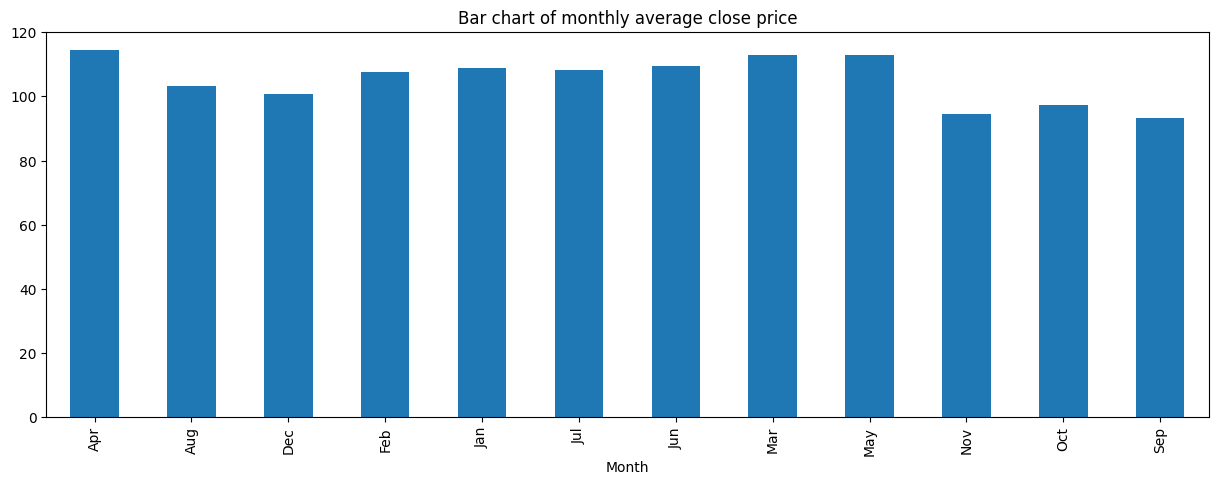

In [ ]:
#visualizing monthly average close price(Bivariate analysis)
plt.figure(figsize=(15,5))
plt.title('Bar chart of monthly average close price')

df_copy.groupby(['Month'])['Close'].mean().plot(kind='bar')
plt.show()

From the above bar chart we can conclude that the average close price was **high** in **April** and **low** in **November**

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
import statsmodels.formula.api as smf

#fit the linear model
model = smf.ols(formula ='Open ~ Close',data = df_copy).fit()

#Check the P-value of coeffiecient
p_value = model.pvalues[1]
if p_value < 0.05:
  print("Reject Null Hypothesis. p_value=",p_value)
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis. p_value= 1.8527745058659732e-126


### Hypothetical Statement - 1

* On every month at end of the month we are seeing a rise of stock price and at the low stock price

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothasis :** There is no difference between open and close stock price over the entire month

**Alternative Hypothsis :** On every month at end of the month we are seeing a rise of stock price and at the low stock price

On every month at end of the month we are seeing a rise of stock price and at the low stock price

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Can impute numerical features with mean or median. But, surprisingly, No missing values are found in the dataset. So, there is no need of handling missing values.

### 2. Handling Outliers

few outliers exist in every column.
So, let's try check data distribution

In [ ]:
df_copy.drop(columns=['index','Month','Day'],inplace=True)
df_copy.head()

,Date,Open,High,Low,Close
0,2018-01-06,13.68,17.16,13.58,15.33
1,2018-01-07,27.40,34.16,27.00,30.16
2,2018-01-08,49.99,55.56,30.24,50.54
3,2018-01-09,15.28,18.34,11.48,12.24
4,2018-01-10,53.60,57.58,46.42,49.84


Open
High
Low
Close


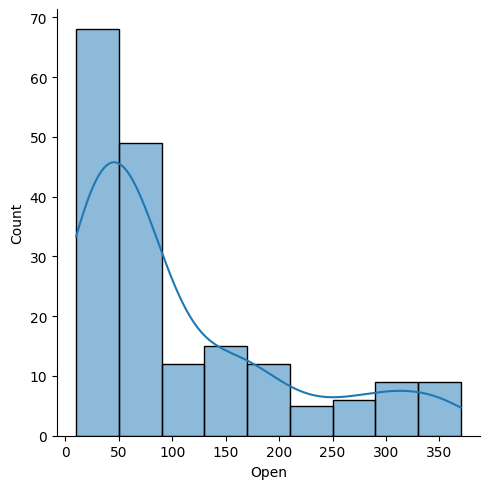

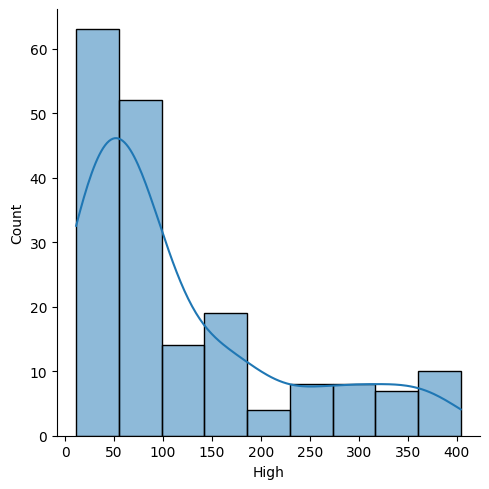

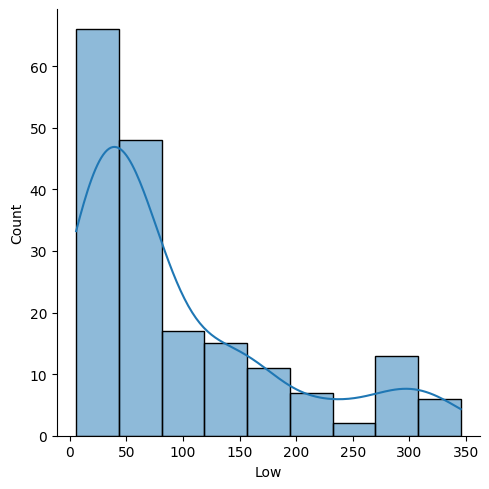

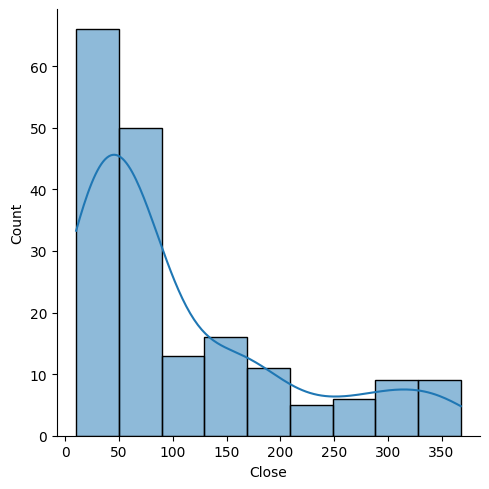

In [ ]:
import seaborn as sns

for i in df[['Open','High','Low','Close']]:
  print(i)
  sns.displot(df[i],kde=True)

The above distplots have shown that the graphs are right-skewed, also known as a positively skewed graph.<br>

Here Mean > Median: In a right-skewed distribution, the mean is typically greater than the median because the higher values on the right tail pull the mean upwards

Open log transformation
High log transformation
Low log transformation
Close log transformation


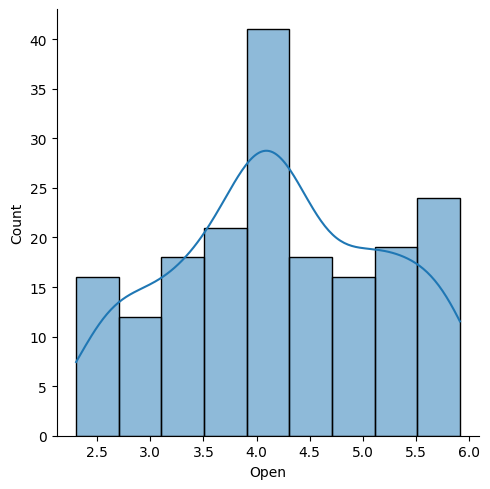

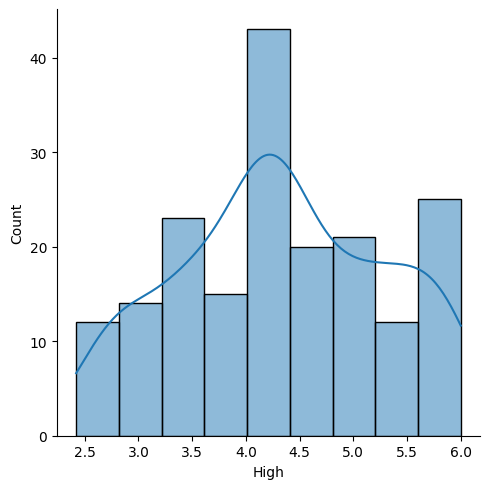

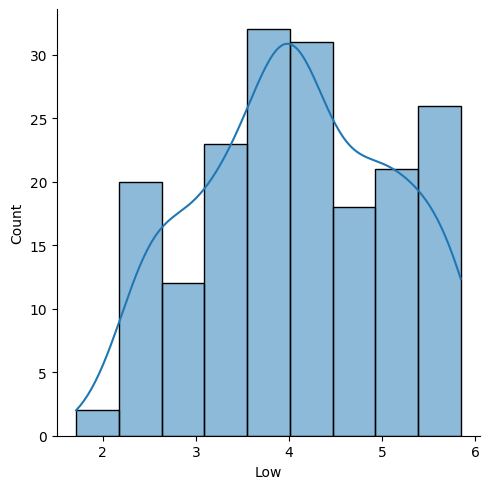

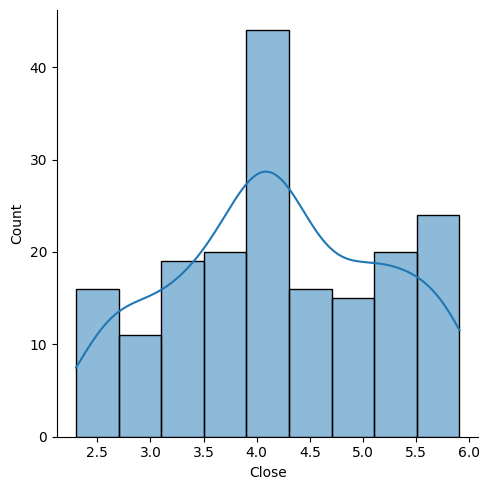

In [ ]:
for i in df_copy.columns[1:]:
  print(i,'log transformation')
  df_copy[i] = np.log(df[i])
  sns.displot(df_copy[i],kde=True)

In [ ]:
df_copy.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,4.214781,4.331309,4.083021,4.211144
std,0.981998,0.955810,1.015082,0.982539
min,2.302585,2.419479,1.713798,2.300583
25%,3.520461,3.587400,3.350255,3.510052
50%,4.142817,4.284276,4.060443,4.135806
75%,5.030438,5.131022,4.929787,5.032397
max,5.913368,6.001415,5.844993,5.907811


In the above table, we can observe that mean values are approximately equal to median values. This indicates that data now follows slightly normal distribution.

In [ ]:
for i in df_copy.columns[1:]:
  print('skewness of',i,df_copy[i].skew())
print()
for i in df_copy.columns[1:]:
  print('kurtosis of',i,df_copy[i].kurtosis())


skewness of Open -0.027947284501846446
skewness of High -0.023123431680916986
skewness of Low -0.04866806954504281
skewness of Close -0.027248053851870683

kurtosis of Open -0.9128600449018998
kurtosis of High -0.8981205038025841
kurtosis of Low -0.8931623401217146
kurtosis of Close -0.917422577448268


Skewness measures the asymmetry of a distribution<br>
and Kurtosis measures the “tailedness” of a distribution. It indicates the presence of outliers and the sharpness of the peak.

Here Since all these skewness values are between -0.5 and 0.5, they indicate that the distributions are approximately symmetrical.<br>kurtosis tells that The distribution has light tails and a flatter peak, indicating fewer outliers.

## ***6. Data Splitting***

In [ ]:
df_copy['Date']=pd.to_datetime(df_copy['Date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
df_copy['Date'] = df_copy['Date'].apply(lambda x: x.timestamp())
df_copy.head()

,Date,Open,High,Low,Close
0,1.515197e+09,2.615935,2.842581,2.608598,2.729812
1,1.515283e+09,3.310543,3.531055,3.295837,3.406517
2,1.515370e+09,3.911823,4.017464,3.409166,3.922765
3,1.515456e+09,2.726545,2.909084,2.440606,2.504709
4,1.515542e+09,3.981549,4.053175,3.837730,3.908818


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    float64
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(5)
memory usage: 7.4 KB


In [ ]:
#seperating independent and dependent variables
independent_variables=[ 'Date','Open', 'High', 'Low']
print("Independent_variables:",independent_variables)

dependent_variable='Close'
print("Dependent_variable:",dependent_variable)

Independent_variables: ['Date', 'Open', 'High', 'Low']
Dependent_variable: Close


In [ ]:
#veiwing x and y.
x=df_copy[independent_variables]
y=df_copy[dependent_variable]
print(x)
print(y)

             Date      Open      High       Low
0    1.515197e+09  2.615935  2.842581  2.608598
1    1.515283e+09  3.310543  3.531055  3.295837
2    1.515370e+09  3.911823  4.017464  3.409166
3    1.515456e+09  2.726545  2.909084  2.440606
4    1.515542e+09  3.981549  4.053175  3.837730
..            ...       ...       ...       ...
180  1.544832e+09  5.030438  5.040324  4.895673
181  1.544918e+09  5.461286  5.501258  5.385641
182  1.545005e+09  5.727499  5.765191  5.705947
183  1.545091e+09  5.159055  5.269403  5.076423
184  1.545178e+09  4.248495  4.255613  3.706228

[185 rows x 4 columns]
0      2.729812
1      3.406517
2      3.922765
3      2.504709
4      3.908818
         ...   
180    4.978319
181    5.443543
182    5.752731
183    5.202632
184    3.849083
Name: Close, Length: 185, dtype: float64


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [ ]:
#printing x_train dataframe
print(x_train)

             Date      Open      High       Low
6    1.515715e+09  3.869533  4.197202  3.831030
95   1.531181e+09  3.980616  4.109890  3.970669
24   1.518653e+09  5.150397  5.158365  5.050497
157  1.541635e+09  2.693951  2.879198  2.420368
178  1.544659e+09  4.309456  4.418841  4.271514
..            ...       ...       ...       ...
57   1.524010e+09  5.720312  5.910119  5.714722
146  1.539389e+09  4.060443  4.336506  4.026779
66   1.526083e+09  4.254193  4.256888  4.074992
135  1.537229e+09  5.849901  5.857933  5.112891
20   1.518307e+09  3.970292  4.055084  3.843958

[138 rows x 4 columns]


In [ ]:
#printing x_test dataframe
print(x_test)

             Date      Open      High       Low
144  1.539216e+09  3.985273  4.171306  3.873282
29   1.519085e+09  3.666122  3.706228  3.514526
81   1.528762e+09  4.181286  4.257030  4.129390
184  1.545178e+09  4.248495  4.255613  3.706228
8    1.515888e+09  4.314015  4.335328  4.107590
17   1.518048e+09  3.929470  3.988428  3.793239
100  1.531613e+09  5.129899  5.168095  5.052736
120  1.534637e+09  4.490881  4.526127  3.973118
151  1.539821e+09  5.192957  5.592665  5.127529
14   1.516406e+09  3.848018  3.881564  3.598681
38   1.520986e+09  4.102974  4.423169  4.099995
34   1.520640e+09  3.867026  3.952397  3.856510
128  1.536624e+09  4.025352  4.095677  3.935740
130  1.536797e+09  3.895894  4.368688  3.802208
115  1.534205e+09  4.676560  4.776515  4.637734
15   1.517875e+09  2.740840  2.831447  2.734368
98   1.531440e+09  4.526127  4.609162  4.055430
85   1.529107e+09  5.329816  5.407172  5.304001
182  1.545005e+09  5.727499  5.765191  5.705947
149  1.539648e+09  5.535009  5.581615  5

In [ ]:
#printing y_train dataframe
print(y_train)

6      4.189503
95     4.077368
24     5.150687
157    2.506342
178    4.304335
         ...   
57     5.891782
146    4.300817
66     4.189958
135    5.211942
20     3.937496
Name: Close, Length: 138, dtype: float64


In [ ]:
#printing x_test dataframe
print(x_test)

             Date      Open      High       Low
144  1.539216e+09  3.985273  4.171306  3.873282
29   1.519085e+09  3.666122  3.706228  3.514526
81   1.528762e+09  4.181286  4.257030  4.129390
184  1.545178e+09  4.248495  4.255613  3.706228
8    1.515888e+09  4.314015  4.335328  4.107590
17   1.518048e+09  3.929470  3.988428  3.793239
100  1.531613e+09  5.129899  5.168095  5.052736
120  1.534637e+09  4.490881  4.526127  3.973118
151  1.539821e+09  5.192957  5.592665  5.127529
14   1.516406e+09  3.848018  3.881564  3.598681
38   1.520986e+09  4.102974  4.423169  4.099995
34   1.520640e+09  3.867026  3.952397  3.856510
128  1.536624e+09  4.025352  4.095677  3.935740
130  1.536797e+09  3.895894  4.368688  3.802208
115  1.534205e+09  4.676560  4.776515  4.637734
15   1.517875e+09  2.740840  2.831447  2.734368
98   1.531440e+09  4.526127  4.609162  4.055430
85   1.529107e+09  5.329816  5.407172  5.304001
182  1.545005e+09  5.727499  5.765191  5.705947
149  1.539648e+09  5.535009  5.581615  5

We have used 75%-25% splitting ratio as simpler models require less data for testing which is enough and efficient in most of the cases

## ***7. ML Model Implementation***

In [ ]:
!pip install nvidia-cublas-cu12==12.1.3.1 nvidia-cuda-cupti-cu12==12.1.105 nvidia-cuda-nvrtc-cu12==12.1.105 nvidia-cuda-runtime-cu12==12.1.105 nvidia-cudnn-cu12==8.9.2.26 nvidia-cufft-cu12==11.0.2.54 nvidia-curand-cu12==10.3.2.106 nvidia-cusolver-cu12==11.4.5.107 nvidia-cusparse-cu12==12.1.0.106 nvidia-nvtx-cu12==12.1.105 nvidia-nccl-cu12==2.20.5
import torch

In [ ]:
!pip install xgboost
!pip install lightgbm
from lightgbm import LGBMRegressor

In [ ]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
xgb=XGBRegressor()
lgbm=LGBMRegressor()
ada=AdaBoostRegressor()
r=Ridge(alpha=0.1)
l=Lasso(alpha=0.1)
e=ElasticNetCV(cv=5)

### ML Models

In [ ]:
def modelling(model, x_train,y_train):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('r2 score',r2_score(y_test,y_pred))
  print('mean absolute error',mean_absolute_error(y_test,y_pred))
  print('mean squared error',mean_squared_error(y_test,y_pred))
  print('mean absolute percentage error',mean_absolute_percentage_error(y_test,y_pred))
  print('---------------------------------------------------------------------------------------------------------------------')


In [ ]:
# ML Model - 1 LINEAR REGRESSION Implementation
modelling(lr,x_train,y_train)

LinearRegression()
r2 score 0.9933150100270165
mean absolute error 0.04714697646416015
mean squared error 0.005381608906171875
mean absolute percentage error 0.01185554446678631
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 2 LASSO Implementation
modelling(l,x_train,y_train)

Lasso(alpha=0.1)
r2 score 0.9740853895834652
mean absolute error 0.10989168091818288
mean squared error 0.020862005594804917
mean absolute percentage error 0.029012342796289288
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 3 RIDGE Implementation
modelling(r,x_train,y_train)

Ridge(alpha=0.1)
r2 score 0.9936244591892546
mean absolute error 0.04833766809934137
mean squared error 0.005132493443884232
mean absolute percentage error 0.012229693483991232
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 4 ELASTICNETCV Implementation
modelling(e,x_train,y_train)

ElasticNetCV(cv=5)
r2 score -0.005156227125545865
mean absolute error 0.714133134808981
mean squared error 0.809179628668721
mean absolute percentage error 0.17699722461107154
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 5 DECISIONTREEREGRESSOR Implementation
modelling(dt,x_train,y_train)

DecisionTreeRegressor()
r2 score 0.9397766889419784
mean absolute error 0.11523925729609284
mean squared error 0.048481494880142785
mean absolute percentage error 0.03113030486555306
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 6 RANDOMFORESTREGRESSOR Implementation
modelling(rf,x_train,y_train)

RandomForestRegressor()
r2 score 0.9630518453028816
mean absolute error 0.09338972187882567
mean squared error 0.029744325599322476
mean absolute percentage error 0.02484634798598861
---------------------------------------------------------------------------------------------------------------------


In [ ]:
# ML Model - 7 XGBREGRESSOR Implementation
modelling(xgb,x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
r2 score 0.9511009798747353
mean absolute error 0.11461708225276258
mean squared error 0.03936511547103402
mean absolute percentage error 0.031020419810974066
----------------------------------------------------------------------------------------------

In [ ]:
# ML Model - 8 LGBMREGRESSOR Implementation
modelling(lgbm,x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 138, number of used features: 4
[LightGBM] [Info] Start training from score 4.194776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
# ML Model - 9 ADABOOSTREGRESSOR Implementation
modelling(ada,x_train,y_train)

AdaBoostRegressor()
r2 score 0.9428328478946001
mean absolute error 0.11011878776363386
mean squared error 0.04602119915725105
mean absolute percentage error 0.029485996840934066
---------------------------------------------------------------------------------------------------------------------


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementation with hyperparameter optimization technique GridSearch CV
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5)
}

# Define the parameter grid
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNetCV': {'l1_ratio': [0.1, 0.5, 0.9], 'alphas': [[0.1, 1.0, 10.0]]}
}

# Perform GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score(neg_mean_squared_error): {grid_search.best_score_}")
    print()
# Evaluate the best models
for name, model in best_estimators.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {name}: {mse}")


Best parameters for Ridge: {'alpha': 0.1}
Best score(neg_mean_squared_error): -0.005335208224100735

Best parameters for Lasso: {'alpha': 0.1}
Best score(neg_mean_squared_error): -0.020681780676141404

Best parameters for ElasticNetCV: {'alphas': [0.1, 1.0, 10.0], 'l1_ratio': 0.1}
Best score(neg_mean_squared_error): -0.013924248685159919

Mean Squared Error for Ridge: 0.005132493443884232
Mean Squared Error for Lasso: 0.020862005594804917
Mean Squared Error for ElasticNetCV: 0.009785682069870976


Range of neg_mean_squared_error=([-∞, 0])
<br>Higher values (closer to 0) indicate better performance, while lower values (more negative) indicate worse performance<br>
The above obtained values for neg_mean_squared_error are close to zero, indicationg better performance

we used gridsearchcv as it systematically searches through a predefined set of hyperparameter values to find the best combination.It simplifies the hyperparameter tuning process, making it more systematic, efficient, and reliable by selecting the best combination of hyperparameters.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#installing shap
!pip install shap

In [ ]:
#importing shap library
import shap


In [ ]:
# Use the best estimator with TreeExplainer
shap.initjs()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_train)

In [ ]:
#creating functions 'show_force_plot()' and 'show_feature_importance_by_best_model()'
shap.initjs()


def show_force_plot(n_plots = 5):
    for i in range(0, n_plots):
        index =np.random.randint(0,len(shap_values))
        shap.force_plot(explainer.expected_value, shap_values[index], features=x_train.iloc[index], feature_names=x_train.columns, matplotlib=True)


def show_feature_importance_by_best_model():
    plt.subplot(1,1,1)
    shap.summary_plot(shap_values = shap_values, features = x_train, feature_names = x_train.columns, plot_size=None)
    plt.subplot(1,2,1)
    shap.summary_plot(shap_values = shap_values, features = x_train, feature_names = x_train.columns, plot_type='bar', plot_size=None)

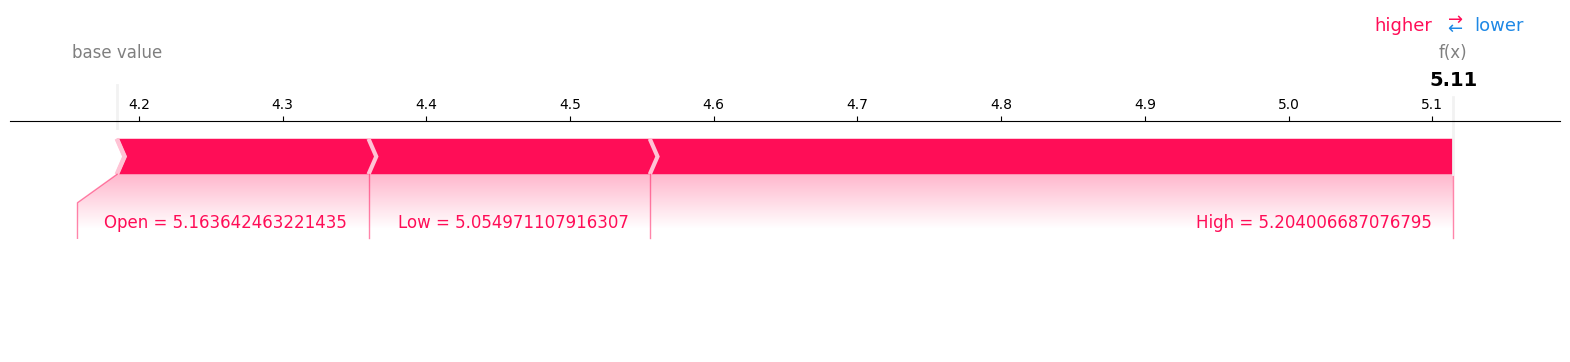

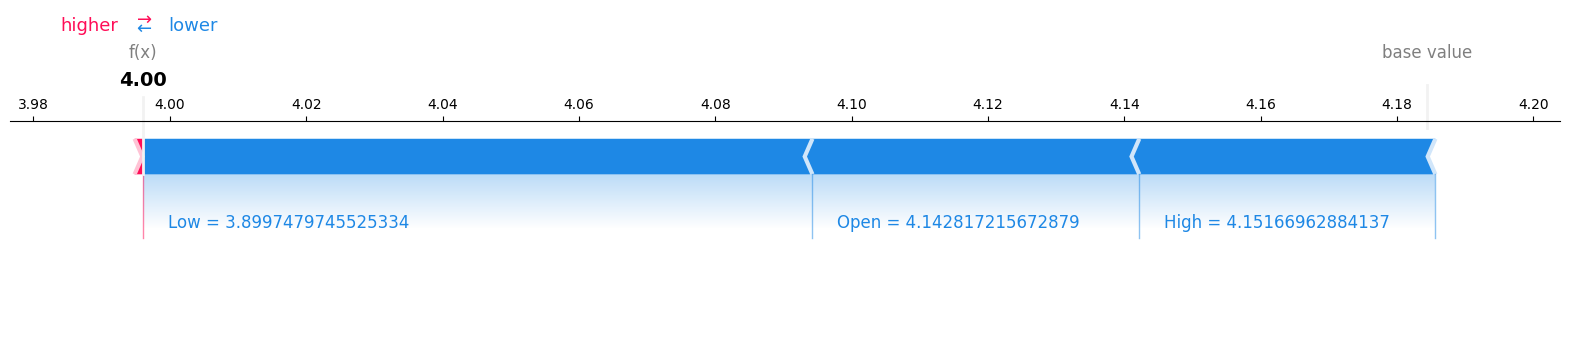

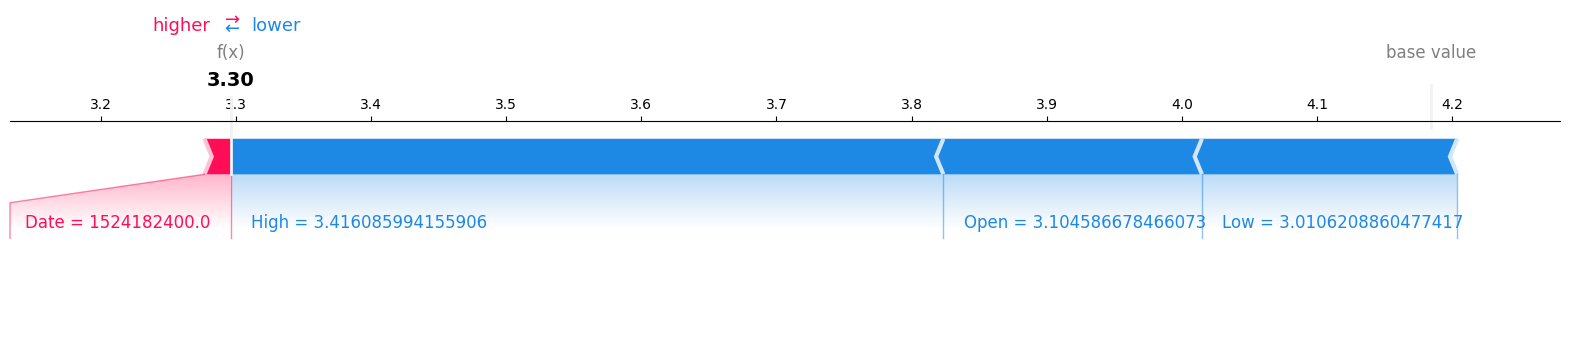

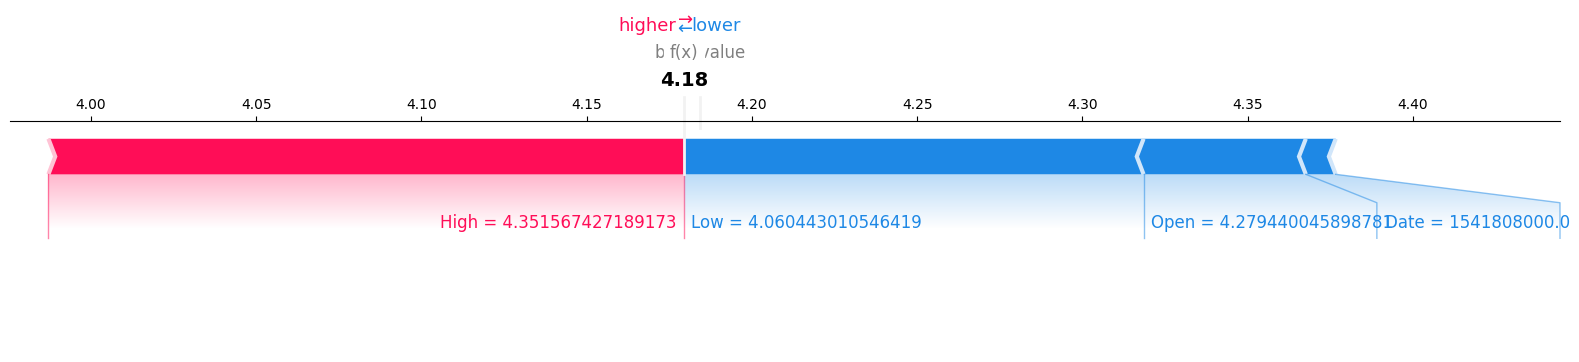

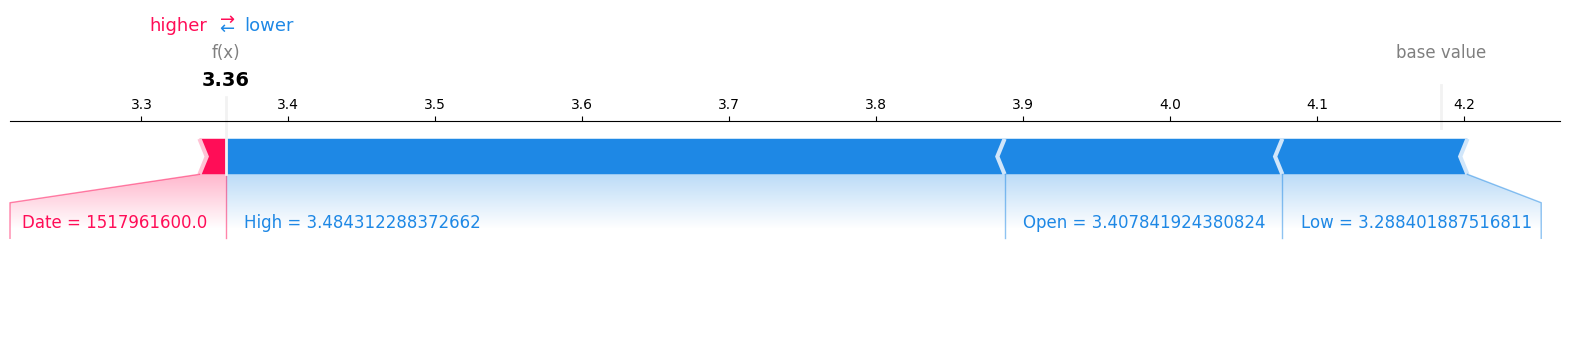

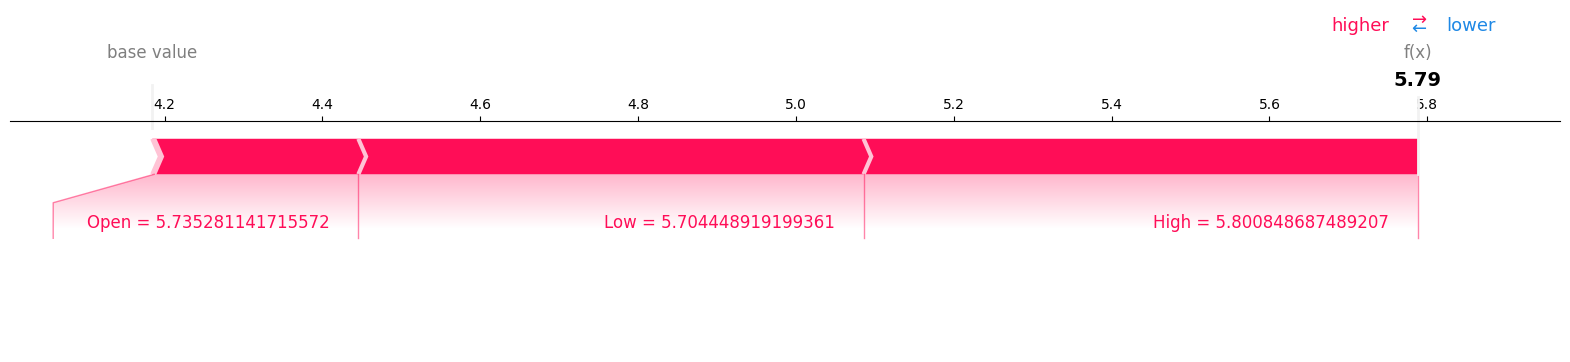

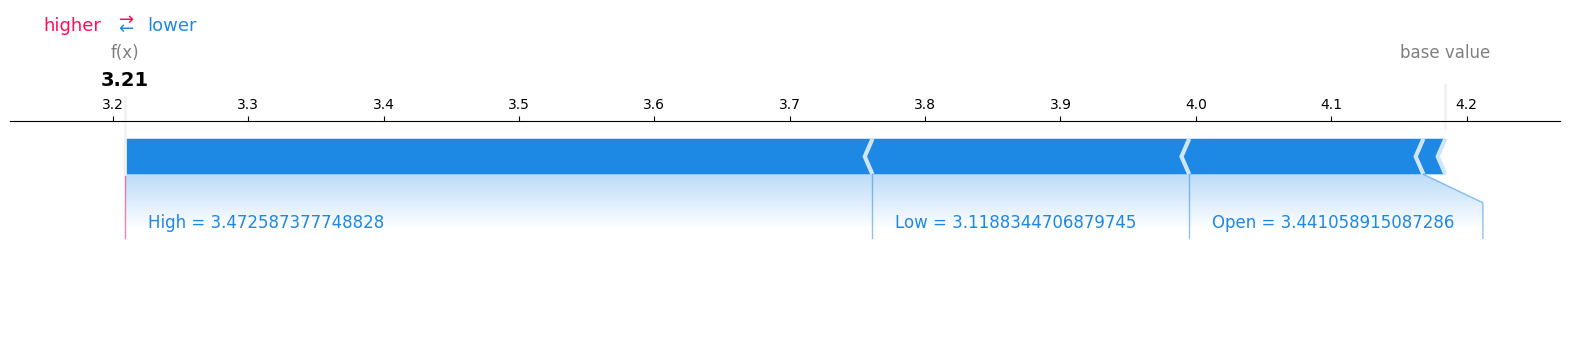

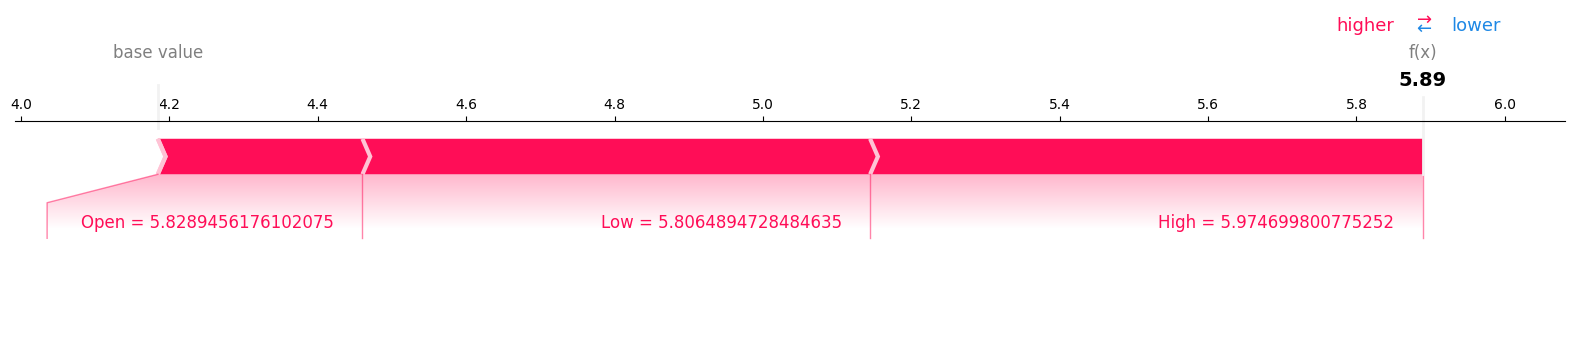

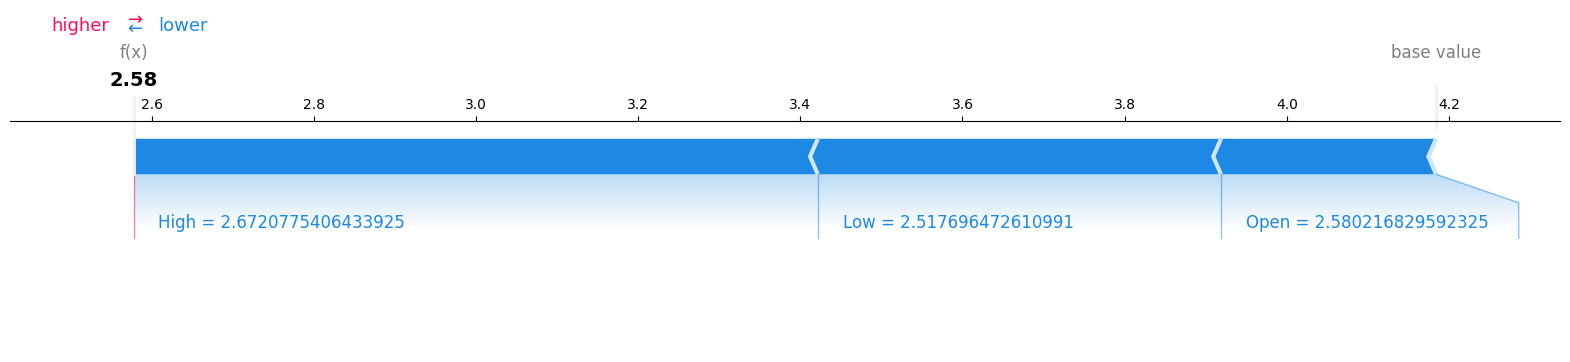

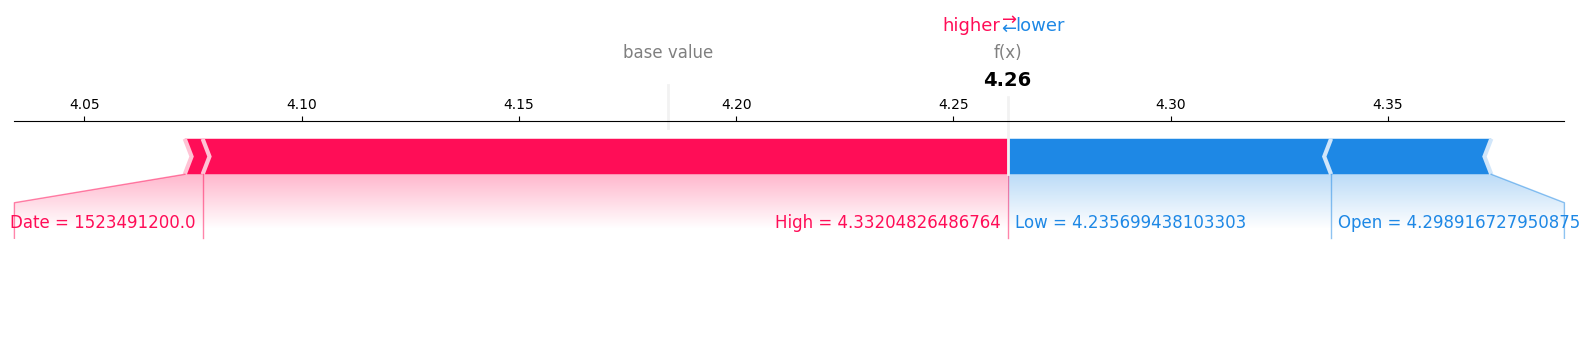

In [ ]:
#calling show_force_plot()
show_force_plot(10)

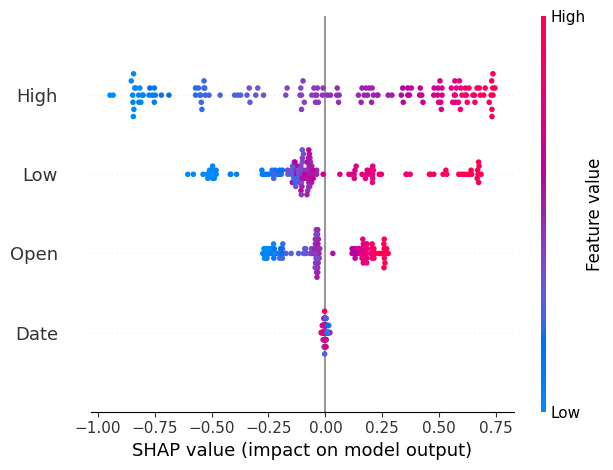

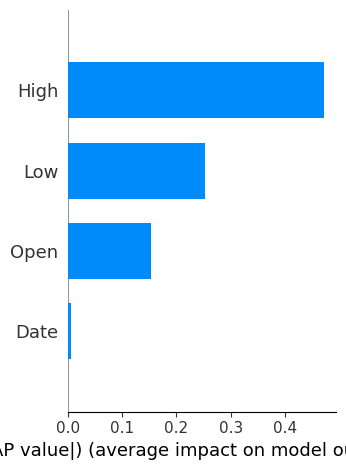

In [ ]:
#calling def show_feature_importance_by_best_model()
show_feature_importance_by_best_model()

# **Conclusion**

### XGBRegressor:
- **R² Score**: 0.9511
- **Mean Absolute Error (MAE)**: 0.1146
- **Mean Squared Error (MSE)**: 0.0394
- **Mean Absolute Percentage Error (MAPE)**: 0.0310

### AdaBoostRegressor:
- **R² Score**: 0.9496
- **Mean Absolute Error (MAE)**: 0.1088
- **Mean Squared Error (MSE)**: 0.0406
- **Mean Absolute Percentage Error (MAPE)**: 0.0291

### Analysis:
- **R² Score**: XGBRegressor has a slightly higher R² score, indicating it explains a bit more variance in the data.
- **MAE**: AdaBoostRegressor has a lower MAE, suggesting it has smaller average absolute errors.
- **MSE**: XGBRegressor has a slightly lower MSE, indicating smaller average squared errors.
- **MAPE**: AdaBoostRegressor has a lower MAPE, indicating it has smaller average percentage errors.

### Conclusion:
Both models perform similarly, but **XGBRegressor** has a slight edge in R² and MSE, while **AdaBoostRegressor** has a lower MAE and MAPE. If you prioritize minimizing absolute errors and percentage errors, <br>**AdaBoostRegressor** might be the better choice. However, if you value explaining more variance and having smaller squared errors, **XGBRegressor** is preferable.



### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***